#Diabetes
dataset de clsificacion para predecir la diabestes de un paciente

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from scipy import optimize

%matplotlib inline

from sklearn.preprocessing import LabelEncoder

In [17]:
df = pd.read_csv("/content/drive/MyDrive/Inteligencia Artificial 1/Laboratorios/ExamenLab1/weatherAUS.csv")
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [18]:
# Reemplazar valores 'NA' con NaN
df.replace('NA', np.nan, inplace=True)
# Convertir 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])
# Convertir valores numéricos a tipo float
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm']
df[numeric_cols] = df[numeric_cols].astype(float)
# Eliminar columnas no deseadas
df.drop(['Evaporation', 'Sunshine'], axis=1, inplace=True)
# Renombrar columnas
df.rename(columns={'WindDir9am': 'WindDirection9am', 'WindDir3pm': 'WindDirection3pm'}, inplace=True)
# Convertir 'RainToday' a variables dummy
df = pd.get_dummies(df, columns=['RainToday'], drop_first=True)

In [19]:
# Convertir las columnas categóricas en variables dummy (one-hot encoding)
categorical_cols = ['Location', 'WindGustDir', 'WindDirection9am', 'WindDirection3pm']
df = pd.get_dummies(df, columns=categorical_cols)

In [20]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 114 entries, Date to WindDirection3pm_WSW
dtypes: bool(98), datetime64[ns](1), float64(14), object(1)
memory usage: 31.4+ MB


,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDirection3pm_NNW,WindDirection3pm_NW,WindDirection3pm_S,WindDirection3pm_SE,WindDirection3pm_SSE,WindDirection3pm_SSW,WindDirection3pm_SW,WindDirection3pm_W,WindDirection3pm_WNW,WindDirection3pm_WSW
0,2008-12-01,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,...,False,False,False,False,False,False,False,False,True,False
1,2008-12-02,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,...,False,False,False,False,False,False,False,False,False,True
2,2008-12-03,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,...,False,False,False,False,False,False,False,False,False,True
3,2008-12-04,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,...,False,False,False,False,False,False,False,False,False,False
4,2008-12-05,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,...,False,True,False,False,False,False,False,False,False,False
5,2008-12-06,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,...,False,False,False,False,False,False,False,True,False,False
6,2008-12-07,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,...,False,False,False,False,False,False,False,True,False,False
7,2008-12-08,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,...,False,False,False,False,False,False,False,True,False,False
8,2008-12-09,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,...,False,True,False,False,False,False,False,False,False,False
9,2008-12-10,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,...,False,False,False,False,True,False,False,False,False,False


In [21]:
# Identificar columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Reemplazar valores faltantes en columnas numéricas con la media
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Reemplazar valores faltantes en columnas categóricas con una categoría "desconocida"
df.fillna('Desconocido', inplace=True)

# Eliminar filas con valores faltantes en caso de que hayas optado por esa estrategia
# df.dropna(inplace=True)
df

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDirection3pm_NNW,WindDirection3pm_NW,WindDirection3pm_S,WindDirection3pm_SE,WindDirection3pm_SSE,WindDirection3pm_SSW,WindDirection3pm_SW,WindDirection3pm_W,WindDirection3pm_WNW,WindDirection3pm_WSW
0,2008-12-01,13.4,22.900000,0.6,44.00000,20.0,24.0,71.0,22.0,1007.7,...,False,False,False,False,False,False,False,False,True,False
1,2008-12-02,7.4,25.100000,0.0,44.00000,4.0,22.0,44.0,25.0,1010.6,...,False,False,False,False,False,False,False,False,False,True
2,2008-12-03,12.9,25.700000,0.0,46.00000,19.0,26.0,38.0,30.0,1007.6,...,False,False,False,False,False,False,False,False,False,True
3,2008-12-04,9.2,28.000000,0.0,24.00000,11.0,9.0,45.0,16.0,1017.6,...,False,False,False,False,False,False,False,False,False,False
4,2008-12-05,17.5,32.300000,1.0,41.00000,7.0,20.0,82.0,33.0,1010.8,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,2.8,23.400000,0.0,31.00000,13.0,11.0,51.0,24.0,1024.6,...,False,False,False,False,False,False,False,False,False,False
145456,2017-06-22,3.6,25.300000,0.0,22.00000,13.0,9.0,56.0,21.0,1023.5,...,False,False,False,False,False,False,False,False,False,False
145457,2017-06-23,5.4,26.900000,0.0,37.00000,9.0,9.0,53.0,24.0,1021.0,...,False,False,False,False,False,False,False,False,True,False
145458,2017-06-24,7.8,27.000000,0.0,28.00000,13.0,7.0,51.0,24.0,1019.4,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 114 entries, Date to WindDirection3pm_WSW
dtypes: bool(98), datetime64[ns](1), float64(14), object(1)
memory usage: 31.4+ MB


In [23]:
# Convertir todas las columnas a tipo numérico
df = df.apply(pd.to_numeric, errors='ignore')

# Verificar los tipos de datos después de la conversión
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 114 entries, Date to WindDirection3pm_WSW
dtypes: bool(98), float64(14), int64(1), object(1)
memory usage: 31.4+ MB


In [24]:
# Eliminar filas con valores nulos o vacíos
df_cleaned = df.dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 114 entries, Date to WindDirection3pm_WSW
dtypes: bool(98), float64(14), int64(1), object(1)
memory usage: 31.4+ MB


In [25]:
print(df.shape)

(145460, 114)


In [28]:
# Calcular la cantidad de valores diferentes en una co
valores = df['RainTomorrow'].unique()
print(valores)

['No' 'Yes']


In [27]:
# Reemplazar valores en la columna 'B'
df['RainTomorrow'].replace({'Desconocido':'Yes'}, inplace=True)

In [29]:
#variables categoricas
columnas_categoricas = df.select_dtypes(include=['bool','object']).columns

In [30]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  df[columna] = le.fit_transform(df[columna])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 114 entries, Date to WindDirection3pm_WSW
dtypes: float64(14), int64(100)
memory usage: 126.5 MB


Separamos los datos- Caracteristicas "**X**" y  Variable objetivo "**y**" para usarlo mas adelante

In [32]:
# Extrae la columna 'RainTomorrow' y la asigna a la variable y
y = df['RainTomorrow'].values
# Elimina la columna 'RainTomorrow' de la matriz X
X = df.drop(columns=['RainTomorrow']).values

In [33]:
# Verificar si hay valores vacíos o nulos en la variable X
nulos_X = np.isnan(X).sum()
nulos_y = np.isnan(y).sum()

print('nulos en X:\n',nulos_X)
print('nulos en y:\n',nulos_y)

nulos en X:
 0
nulos en y:
 0


## **Calaculos**


# Funcion de la Sigmoide

In [34]:
def calcularSigmoide(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

agregamos la una primera columna de unos

In [35]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [36]:
#Revisamos
X

array([[1.0000000e+00, 1.2280896e+18, 1.3400000e+01, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.2281760e+18, 7.4000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.2282624e+18, 1.2900000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [1.0000000e+00, 1.4981760e+18, 5.4000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.4982624e+18, 7.8000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.4983488e+18, 1.4900000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

## Normalizamos
nota: siempre normalizar

In [37]:
from sklearn.preprocessing import StandardScaler
# Crea un objeto StandardScaler
scaler = StandardScaler()
# Ajusta y transforma toda la matriz de características
X_norm = scaler.fit_transform(X)

In [38]:
# Revisamos
X_norm

array([[ 0.        , -1.72187528,  0.18944661, ..., -0.27330429,
         3.92322649, -0.26460377],
       [ 0.        , -1.72078953, -0.75310073, ..., -0.27330429,
        -0.25489224,  3.77923569],
       [ 0.        , -1.71970377,  0.110901  , ..., -0.27330429,
        -0.25489224,  3.77923569],
       ...,
       [ 0.        ,  1.67218871, -1.06728318, ..., -0.27330429,
         3.92322649, -0.26460377],
       [ 0.        ,  1.67327446, -0.69026424, ..., -0.27330429,
        -0.25489224, -0.26460377],
       [ 0.        ,  1.67436022,  0.42508345, ..., -0.27330429,
        -0.25489224, -0.26460377]])

# Funcion Costo Gradiente

# Funcion de costo en una regresion logistica

In [39]:
def calcularCostoR(theta, X, y, lambda_):
    m = y.size
    h = calcularSigmoide(X.dot(theta.T))
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + reg_term
    return J

# Funcion de Descenso por el Gradiente

La REGULARIZACION SOLO CAMBIA LA FUNCION DE COSTO

In [40]:
def descensoGradienteR(theta, X, y, alpha, lambda_, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        h = calcularSigmoide(X.dot(theta.T))
        reg_term = (lambda_ / m) * theta[1:]
        theta[0] = theta[0] - (alpha / m) * (h - y).dot(X[:, 0])
        theta[1:] = theta[1:] * (1 - alpha * (lambda_ / m)) - (alpha / m) * (h - y).dot(X[:, 1:])
        theta[1:] = theta[1:] - reg_term
        J_history.append(calcularCostoR(theta, X, y, lambda_))
    return theta, J_history

Separar el 80% de los datos para entrenamiento y el 20% para hacer las pruebas

In [41]:
from sklearn.model_selection import train_test_split
# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Configuracion de Hiperparametros para el entrenamiento del Modelo

theta calculado por el descenso por el gradiente: 
 [ 0.00000000e+00  2.42086532e-03  6.63834290e-02 -6.42932428e-02
  1.57435733e-01  2.05041482e-01  3.63468511e-02 -2.77489610e-02
  1.16644779e-01  3.62081667e-01 -1.16290532e-01 -1.54663749e-01
  7.91736739e-02  1.71721345e-01  2.45192600e-02 -9.02439585e-02
  1.32285303e-01  3.19304404e-02 -5.15362818e-03  2.42645810e-03
  1.29612493e-02  1.97771840e-03 -3.60527441e-02 -7.25558870e-03
  2.35653326e-02  1.48731328e-02 -1.79224339e-02  6.31107045e-03
  1.03425724e-02  1.22736972e-02 -1.28068535e-02 -8.98911243e-03
 -3.92232279e-02 -1.40024714e-02 -3.42435661e-02  6.62701072e-02
 -3.63312197e-02 -4.14606798e-03  1.44637110e-02 -3.46087295e-03
 -2.51404045e-02  2.04594268e-03 -1.56494039e-02 -1.47384171e-02
 -5.81499154e-03 -2.00082953e-03  3.37175560e-02  6.91662715e-03
  2.29586071e-02  1.05134078e-02  1.59537743e-04 -8.89061663e-04
 -3.14140404e-02 -2.93586770e-03  5.17650933e-03 -2.21041046e-03
 -3.35874081e-02 -6.89478214e-03  1.10

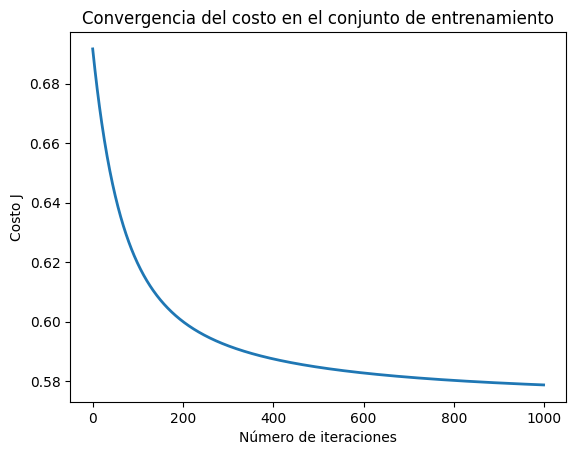

In [44]:
# Configurar hiperparámetros y realizar descenso por el gradiente en el conjunto de entrenamiento
alpha = 0.01
num_iters = 1000       #con 500 iteraciones ya tenemos una buena convergencia
lambda_= 100
theta = np.zeros(114)

#theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

theta, J_history = descensoGradienteR(theta, X_train, y_train, alpha,lambda_, num_iters)

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: \n',(theta))


# Graficar la convergencia del costo en el conjunto de entrenamiento
pyplot.plot(np.arange(len(J_history)), (J_history), lw=2)

print(f"con un costo de: { J_history[-1]} ")

pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del costo en el conjunto de entrenamiento')
pyplot.show()


In [45]:
#Revisamos las dimensiones de X_normalizada
print(X_norm.shape)

(145460, 114)


In [46]:
#Revisamos las dimensiones de Theta
tita = pd.DataFrame(theta)
print(tita.shape)

(114, 1)


# Funcion para calcular la precision de las predicciones

In [47]:
def calcularPrecision(predictions, labels):
    # Convertir predicciones a etiquetas binarias (0 o 1)
    predictions_binary = (predictions >= 0.5).astype(int)

    # Calcular la precisión
    correct_predictions = np.sum(predictions_binary == labels)
    total_examples = len(labels)
    precision = correct_predictions / total_examples

    return precision

Y por ultimo Hacemos las predicciones con el otro 20% de datos faltantes para la evaluacion del Modelo

In [48]:
# Realizar predicciones en el conjunto de entrenamiento
y_predicha = calcularSigmoide(np.dot(X_train, theta))

# Calcular la precisión utilizando la función calcularPrecision
precision_entrenamiento = calcularPrecision(y_predicha, y_train)

# Contar el número total de predicciones correctas e incorrectas en una sola línea
total_correct_predictions = np.sum(y_predicha.round() == y_train)
total_incorrect_predictions = len(y_train) - total_correct_predictions

# Imprimir resultados de las pruebas en el conjunto de entrenamiento
print('Resultados en el conjunto de entrenamiento:')
print(f'Número total de predicciones correctas: {total_correct_predictions}')
print(f'Número total de predicciones incorrectas: {total_incorrect_predictions}')
print(f'Porcentaje de precisión: {precision_entrenamiento:.2%}')


Resultados en el conjunto de entrenamiento:
Número total de predicciones correctas: 83001
Número total de predicciones incorrectas: 33367
Porcentaje de precisión: 71.33%


In [49]:
# Realizar predicciones en el conjunto de entrenamiento
y_predicha = calcularSigmoide(np.dot(X_test, theta))

# Calcular la precisión utilizando la función calcularPrecision
precision_entrenamiento = calcularPrecision(y_predicha, y_test)

# Contar el número total de predicciones correctas e incorrectas en una sola línea
total_correct_predictions = np.sum(y_predicha.round() == y_test)
total_incorrect_predictions = len(y_test) - total_correct_predictions

# Imprimir resultados de las pruebas en el conjunto de prueba
print('Resultados en el conjunto de entrenamiento:')
print(f'Número total de predicciones correctas: {total_correct_predictions}')
print(f'Número total de predicciones incorrectas: {total_incorrect_predictions}')
print(f'Porcentaje de precisión: {precision_entrenamiento:.2%}')


Resultados en el conjunto de entrenamiento:
Número total de predicciones correctas: 20738
Número total de predicciones incorrectas: 8354
Porcentaje de precisión: 71.28%
